##This notebook consists of six parts 

- Data Manipulation
- Assumptions
- Insights
- Additional Informations Needed
- Visualization
- Future Improvement


##Data Manipulation

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
data=pd.read_csv('/Users/mac/Downloads/subj_measures.csv')
data.head(5) 

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,2348,mood,2.76
1,2019-06-13T16:33:34.399Z,5232,sleep,2.44
2,2018-12-26T14:24:00.436Z,4209,sleep,1.88
3,2019-07-17T20:11:23.792Z,2802,mood,2.20
4,2019-05-09T17:27:50.900Z,2025,mood,4.00


In [201]:
#Separate date and time
data['time']=data['date'].apply(lambda x:x[11:19])
data['date']=data['date'].apply(lambda x:x[0:10])

#Rename "type" column 
data = data.rename(columns={'type': 'metrics'})

#Reorder columns
data = data[['date', 'time', 'user_id', 'metrics','value']]

#Convert date column to datetime 
data['date']=pd.to_datetime(data['date'])

##Assumptions

- My first assumption about the data is that our patients reported their metrics honestly, which means it can truly reflect their mood, stress, rumination and sleep. 

- My next assumption is that for each patient, the time interval between two responses is uniform, so that we can better measure their trend and patterns.

##Insights

In [226]:

d=data.copy()

print('Stress was reported {} times'.format(d[d['metrics']=='anticipatoryStress'].shape[0]))
print('Sleep was reported {} times'.format(d[d['metrics']=='sleep'].shape[0]))
print('Mood was reported {} times'.format(d[d['metrics']=='mood'].shape[0]))
print('Rumination was reported {} times'.format(d[d['metrics']=='ruminationStress'].shape[0]))


Stress was reported 332 times
Sleep was reported 3415 times
Mood was reported 3397 times
rumination was reported 316 times


- First insights that I can draw is that sleep and mood are rated very frequently, whereas stress and rumination are rated very infrequently. This could be the fact that people don't like to talk about their stress or rumination very often.

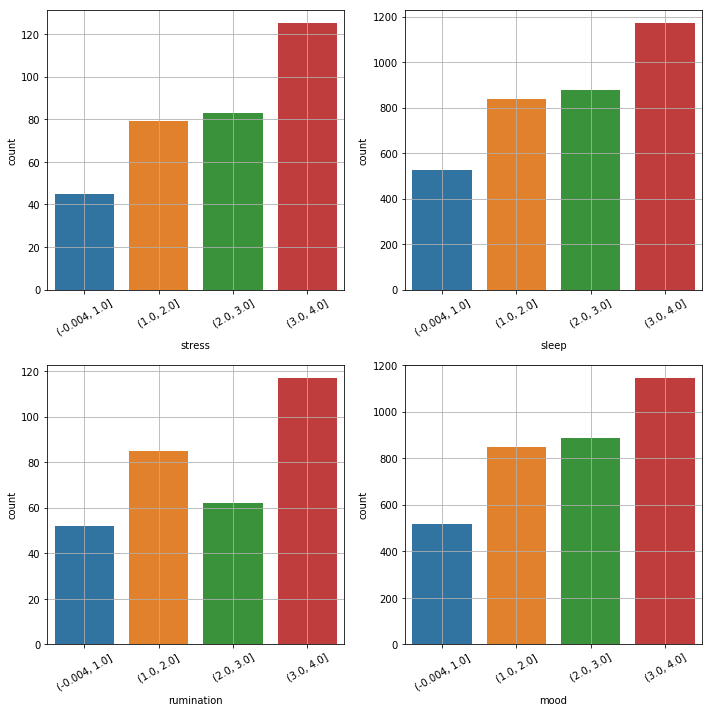

In [254]:
f = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(pd.cut(d[d['metrics']=='anticipatoryStress']['value'],4))
plt.xlabel('stress')
plt.xticks(rotation = 30)
plt.grid()
plt.subplot(2,2,2)
sns.countplot(pd.cut(d[d['metrics']=='sleep']['value'],4))
plt.xlabel('sleep')
plt.xticks(rotation = 30)
plt.grid()
plt.subplot(2,2,3)
sns.countplot(pd.cut(d[d['metrics']=='ruminationStress']['value'],4))
plt.xlabel('rumination')
plt.xticks(rotation = 30)
plt.grid()
plt.subplot(2,2,4)
sns.countplot(pd.cut(d[d['metrics']=='mood']['value'],4))
plt.xlabel('mood')
plt.xticks(rotation = 30)
plt.grid()
plt.tight_layout()

- The second insight that I can draw is that the distribution of the rates are skewed. From four count plots above, it is interesting to find that patients report somewhere between 3 and 4 very often.

##Additional pieces of information

- I believe it would be important to collect the date and time of therapy so that we can track and evaluate if the theray has effect immediately, or does it take longer time to make a difference. 

- If possible, I think it would be helpful to ask patients to write down what happened that day that might affect their scores. For instance, if a patient rate his sleep as bad that day, probably it was because he had a coffee last night, and this kind of situation should be an outlier. Another way to avoid outlier is to ask our patients to rate four metrics on a timely basis.

- Finally, I believe it would be helpful to ask our patients to enter values for four metrics on the same day so that we can evaluate the interactions between four metrics. i.e. Adam has a good mood because he is less stressful that day and had a good sleep last night.

##Visualization

In [276]:
def visualization(user_id, metrics,style='bar'):
    if style=='bar':
        data1=data[(data['user_id'] == user_id) & (data['metrics'] == metrics)].sort_values(by = ['date'])
        plt.figure(figsize = (16, 6))
        plt.bar(data1['date'].values,data1['value'].values,width = 1.5)
        plt.title('Barplot for User {} {} Score'.format(user_id, metrics))
        plt.grid()
        plt.show()
    elif style=='scatter':
        data1=data[(data['user_id'] == user_id) & (data['metrics'] == metrics)].sort_values(by = ['date'])
        plt.figure(figsize = (16, 6))
        plt.plot('date','value',data=data1,marker='o')
        plt.title('Scatterplot for User {} {} Score'.format(user_id, metrics))
        plt.grid()
        plt.show()
    elif style=='count':
        data1=data[(data['user_id'] == user_id) & (data['metrics'] == metrics)].sort_values(by = ['date'])
        sns.countplot(pd.cut(data1[data1['metrics']==metrics]['value'],4))
        plt.title('Countplot for User {} {} Score'.format(user_id, metrics))
        plt.xlabel(metrics)
        plt.grid()

The function above enables us to visualize inidividual patient's progress by specifying his/her id, metrics, and plot styles. You can choose among three kinds of plot: 1. bar plot(default) 2. scatterplot 3. countplot. Examples are given below

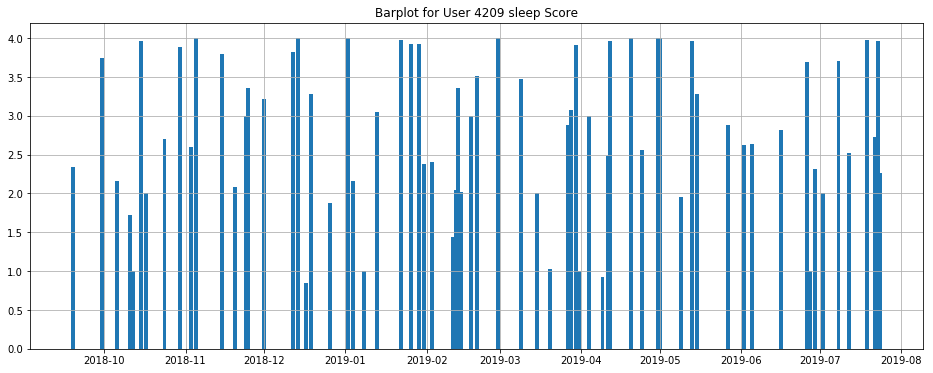

In [277]:
visualization(4209,'sleep',style='bar')

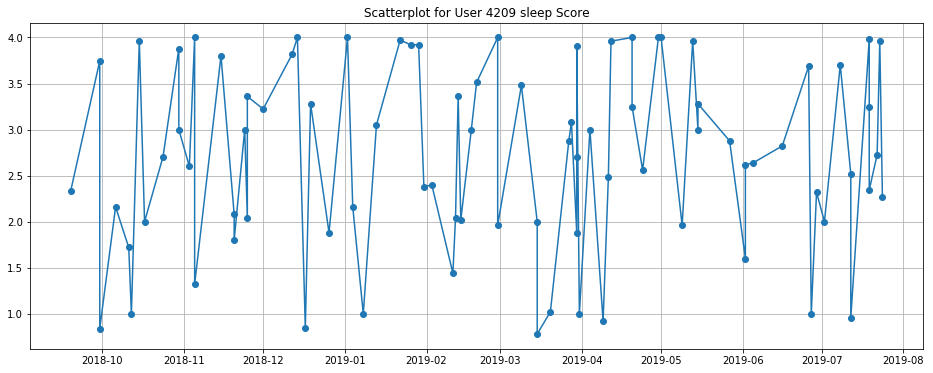

In [278]:
visualization(4209,'sleep',style='scatter')

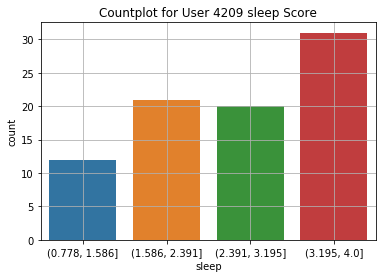

In [279]:
visualization(4209,'sleep',style='count')

##Future Improvement

- If time allows, I would dig deeper by looking at the exact time that our patients enter their measures to find out some trends. For example, whether or not patients rate rumination higher at night.